In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##### Number of Row and Columns

In [120]:
rows = df.shape[0]
cols = df.shape[1]

print(f"This dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

This dataset has  17880 rows and 18 columns .


#####  Null Values in Dataset


In [121]:
[[features, df[features].isnull().sum()] for features in df.columns if df[features].isnull().sum() > 0]

[['location', 346],
 ['department', 11547],
 ['salary_range', 15012],
 ['company_profile', 3308],
 ['description', 1],
 ['requirements', 2696],
 ['benefits', 7212],
 ['employment_type', 3471],
 ['required_experience', 7050],
 ['required_education', 8105],
 ['industry', 4903],
 ['function', 6455]]

#####  Heatmap of Missing Values

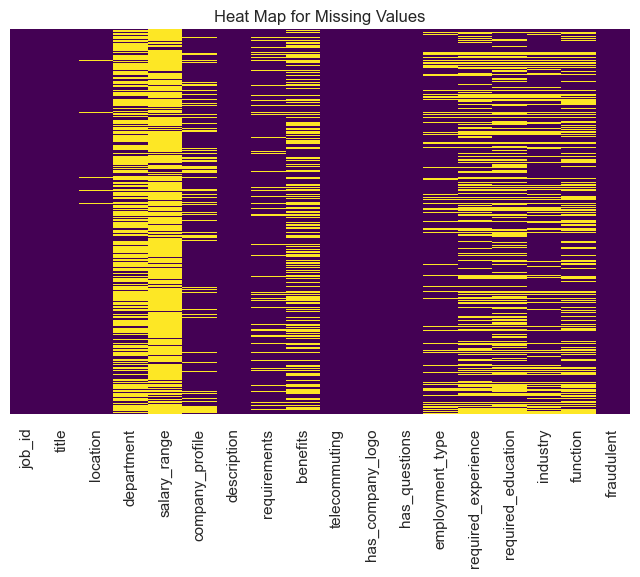

In [122]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show() 

#####  Droping unnecessary Columns

In [123]:
columns = ['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']

for col in columns:
    del df[col]
    
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##### Filling NaN values with Blank space

In [124]:
df.fillna('', inplace=True)

## Exploratory Data Analysis

#####  Comparing Number of Fraudlent and Non-Fraudlent Job Posting

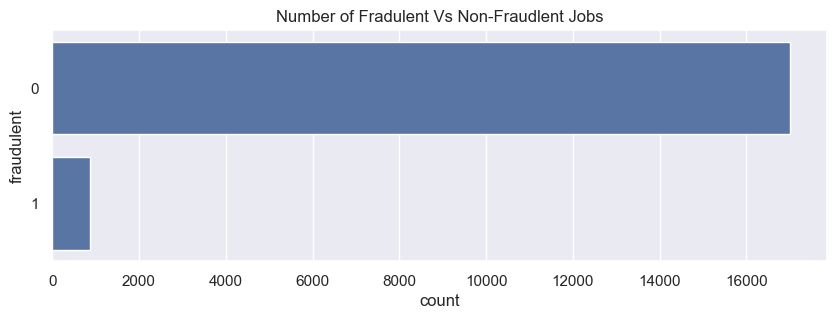

In [125]:
fig = sns.set(rc={'figure.figsize': (10, 3)})
plt.title("Number of Fradulent Vs Non-Fraudlent Jobs")
sns.countplot(y='fraudulent', data=df)
plt.show()

In [126]:
not_fraudulent = df.groupby('fraudulent')['fraudulent'].count()[0]
fraudulent = df.groupby('fraudulent')['fraudulent'].count()[1]

print(f"\033[1m {not_fraudulent}\033[0m jobs are \033[1mNOT Fraudulent\033[0m and \033[1m{fraudulent}\033[0m jobs are \033[1mFraudulent\033[0m.")

 17014 jobs are NOT Fraudulent and 866 jobs are Fraudulent.


#####  Experiencewise Count

In [127]:
exp = dict(df.required_experience.value_counts())
del exp['']

exp_df = pd.DataFrame.from_dict(exp, orient ='index') 
exp_df.T

,Mid-Senior level,Entry level,Associate,Not Applicable,Director,Internship,Executive
0,3809,2697,2297,1116,389,381,141


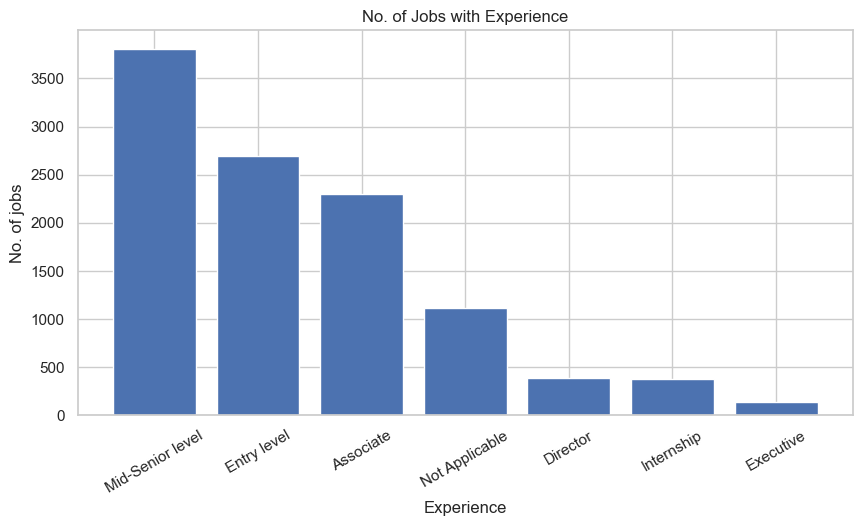

In [128]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience')
plt.ylabel('No. of jobs')
plt.xticks(rotation=30)
plt.show()

##### Countrywise Job Count

In [129]:
# First Spliting location Column to extract Country Code
def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)

df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [130]:
countr = dict(df.country.value_counts()[:14])
del countr['']
countr

countr_df = pd.DataFrame.from_dict(countr, orient ='index') 
countr_df.T

,US,GB,GR,CA,DE,NZ,IN,AU,PH,NL,BE,IE,SG
0,10656,2384,940,457,383,333,276,214,132,127,117,114,80


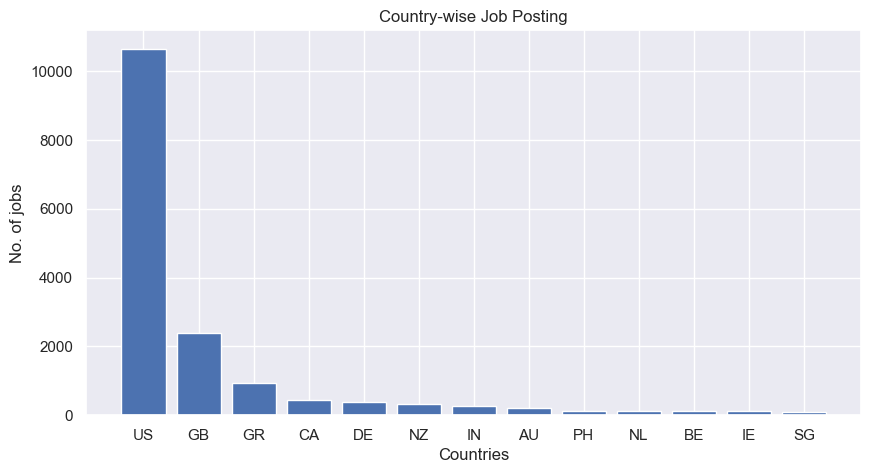

In [131]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
plt.title('Country-wise Job Posting')
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs')
plt.xlabel('Countries')
plt.show()

#####  Education Job Count

In [132]:
edu = dict(df.required_education.value_counts()[:7])
del edu['']
edu

edu_df = pd.DataFrame.from_dict(edu, orient ='index') 
edu_df.T

,Bachelor's Degree,High School or equivalent,Unspecified,Master's Degree,Associate Degree,Certification
0,5145,2080,1397,416,274,170


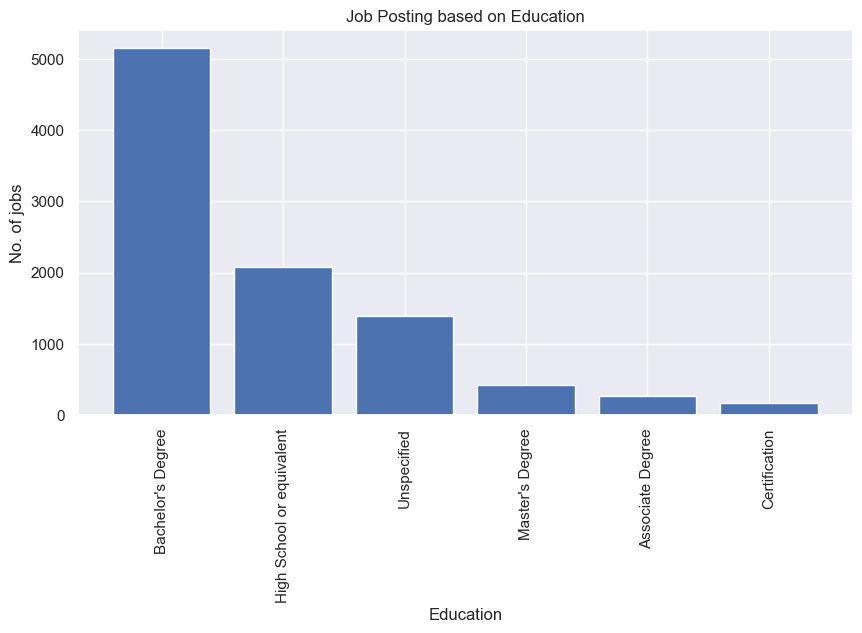

In [133]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
plt.title('Job Posting based on Education')
plt.bar(edu.keys(), edu.values())
plt.ylabel('No. of jobs')
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.show()

##### Top 10 Titles of Jobs Posted which were NOT fraudulent

In [134]:
print(df[df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


#####  Top 10 Titles of Jobs Posted which were fraudulent

In [135]:
print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


## Text Preprocessing

#####  Creating Target and Text Dataframe

In [136]:
def text_fraud_df(df):

    # replacing Na values with nothing as a string
    df.fillna('', inplace=True)

    # creating a new column named "text"
    # which is concatination of "title", "company_profile", "description", "requirements", benifits
    # ' ' space between two concatinations
    df['text'] = df['title'] + ' ' + df['company_profile'] + ' '+ df['description'] + df['requirements'] + ' ' + df['benefits'] 


    for col in df.columns:
        # remove all columns except "text" and Fradulent
        if col not in ['text','fraudulent']:
            del df[col]
    
    return df

In [137]:
df = text_fraud_df(df)
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


#####  Lemmatization, Stopword and Punctuation Removal

In [138]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Text Preprocessing with varoius combination

def spacy_process(text):
  # Converts to lowercase
  text = text.strip().lower()

  # passing text to spacy's nlp object
  doc = nlp(text)
    
  # Lemmatization
  lemma_list = []
  for token in doc:
    lemma_list.append(token.lemma_)
  
  # Filter the stopword
  filtered_sentence =[] 
  for word in lemma_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
      filtered_sentence.append(word)
    
  # Remove punctuation
  punctuations="?:!.,;$\'-_"
  for word in filtered_sentence:
    if word in punctuations:
      filtered_sentence.remove(word)

  return " ".join(filtered_sentence)

In [139]:
df.loc[:,"text"] = df.loc[:,"text"].apply(spacy_process)
df.head()

,fraudulent,text
0,0,marketing intern food52 create groundbreaking ...
1,0,customer service cloud video production 90 sec...
2,0,commission machinery assistant ( cma ) valor s...
3,0,account executive washington dc passion improv...
4,0,bill review manager spotsource solution llc gl...


In [140]:
df.to_csv('clean_df.csv', index=False)

In [141]:
df = pd.read_csv('clean_df.csv')
df.head(2)

,fraudulent,text
0,0,marketing intern food52 create groundbreaking ...
1,0,customer service cloud video production 90 sec...


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fraudulent  17880 non-null  int64 
 1   text        17880 non-null  object
dtypes: int64(1), object(1)
memory usage: 279.5+ KB


## Model Buliding

##### Helper Functions

In [143]:
from numpy import sqrt, argmax
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [144]:
# Creating a Dataframe with word-vectors in TF-IDF form and Target values

def final_df(df, is_train, vectorizer, column):

    # TF-IDF form
    if is_train:
        x = vectorizer.fit_transform(df.loc[:,column])
    else:
        x = vectorizer.transform(df.loc[:,column])

    # TF-IDF form to Dataframe
    temp = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

    # Droping the text column
    df.drop(df.loc[:,column].name, axis = 1, inplace=True)

    # Returning TF-IDF form with target
    return pd.concat([temp, df], axis=1)

In [145]:
# Training the model with various combination and returns y_test and y_pred

def train_model(df, input, target, test_size, over_sample, vectorizer, model):

    X = df.drop(target, axis=1)
    y = df[target]
    print("Splitted Data into X and Y.")

    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print("Splitted Data into Train and Test.")
    
    # Training Preprocessing
    X_train = final_df(X_train, True, vectorizer, input)
    X_train.dropna(inplace=True)
    print("Vectorized Training Data.")

    if over_sample:
        sm = SMOTE(random_state = 2)
        X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())
        print("Oversampling Done for Training Data.")

    # Testing Preprocessing
    x_test = final_df(x_test, False, vectorizer, input)
    x_test.dropna(inplace=True)
    print("Vectorized Testing Data.")

    # fitting the model
    model = model.fit(X_train, Y_train)
    print("Model Fitted Successfully.")

    # calculating y_pred
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)
    roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 2)

    print(f"\n \033[1mROC-AUC Score\033[0m \t\t: {roc_auc*100} %")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    
    # calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1-fpr))
    
    # locate the index of the largest g-mean
    ix = argmax(gmeans)
    print('\033[1mBest Threshold\033[0m \t\t: %.3f \n\033[1mG-Mean\033[0m \t\t\t: %.3f' % (thresholds[ix], gmeans[ix]))

    y_pred = (y_pred > thresholds[ix])

    accuracy = accuracy_score(y_test, y_pred)
    print("\033[1mModel Accuracy\033[0m \t\t:", round(accuracy,2,)*100, "%")

    print("\033[1m\nClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))

    return model

#####  Training Model with Various Config

In [146]:
cv = CountVectorizer(ngram_range=(1, 1), max_features = 500)
model = LogisticRegression(max_iter=1000)

model = train_model(
    df=df, 
    input='text', 
    target='fraudulent', 
    test_size=0.2,
    over_sample=True, 
    vectorizer=cv, 
    model=model)

Splitted Data into X and Y.
Splitted Data into Train and Test.
Vectorized Training Data.


C:\Users\Ichrak.Friji\AppData\Local\Temp\ipykernel_16096\2084387305.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())


Oversampling Done for Training Data.
Vectorized Testing Data.
Model Fitted Successfully.

 ROC-AUC Score 		: 92.0 %
Best Threshold 		: 0.144 
G-Mean 			: 0.874
Model Accuracy 		: 94.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3395
           1       0.43      0.76      0.55       181

    accuracy                           0.94      3576
   macro avg       0.71      0.85      0.76      3576
weighted avg       0.96      0.94      0.95      3576



In [147]:
cv = CountVectorizer(ngram_range=(1, 1), max_features = 500)
rfc = RandomForestClassifier(n_jobs=3, oob_score=True, n_estimators=100, criterion="gini")

rfc = train_model(
    df=df, 
    input='text', 
    target='fraudulent', 
    test_size=0.2,
    over_sample=True, 
    vectorizer=cv, 
    model=rfc)

Splitted Data into X and Y.
Splitted Data into Train and Test.
Vectorized Training Data.


C:\Users\Ichrak.Friji\AppData\Local\Temp\ipykernel_16096\2084387305.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())


Oversampling Done for Training Data.
Vectorized Testing Data.
Model Fitted Successfully.

 ROC-AUC Score 		: 97.0 %
Best Threshold 		: 0.160 
G-Mean 			: 0.917
Model Accuracy 		: 98.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.95      0.57      0.72       181

    accuracy                           0.98      3576
   macro avg       0.97      0.79      0.85      3576
weighted avg       0.98      0.98      0.97      3576



In [148]:
tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features = 500)
lr = LogisticRegression()

rfc = train_model(
    df=df, 
    input='text', 
    target='fraudulent', 
    test_size=0.2,
    over_sample=True, 
    vectorizer=tfidf, 
    model=lr)

Splitted Data into X and Y.
Splitted Data into Train and Test.
Vectorized Training Data.


C:\Users\Ichrak.Friji\AppData\Local\Temp\ipykernel_16096\2084387305.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())


Oversampling Done for Training Data.
Vectorized Testing Data.
Model Fitted Successfully.

 ROC-AUC Score 		: 94.0 %
Best Threshold 		: 0.401 
G-Mean 			: 0.871
Model Accuracy 		: 93.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3395
           1       0.40      0.80      0.53       181

    accuracy                           0.93      3576
   macro avg       0.69      0.87      0.75      3576
weighted avg       0.96      0.93      0.94      3576



In [149]:
tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features = 500)
svc = SVC(probability=True)

rfc = train_model(
    df=df, 
    input='text', 
    target='fraudulent', 
    test_size=0.2,
    over_sample=True, 
    vectorizer=tfidf, 
    model=svc)

Splitted Data into X and Y.
Splitted Data into Train and Test.
Vectorized Training Data.


C:\Users\Ichrak.Friji\AppData\Local\Temp\ipykernel_16096\2084387305.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())


Oversampling Done for Training Data.
Vectorized Testing Data.
Model Fitted Successfully.

 ROC-AUC Score 		: 97.0 %
Best Threshold 		: 0.001 
G-Mean 			: 0.925
Model Accuracy 		: 98.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.65      0.79       181

    accuracy                           0.98      3576
   macro avg       0.99      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



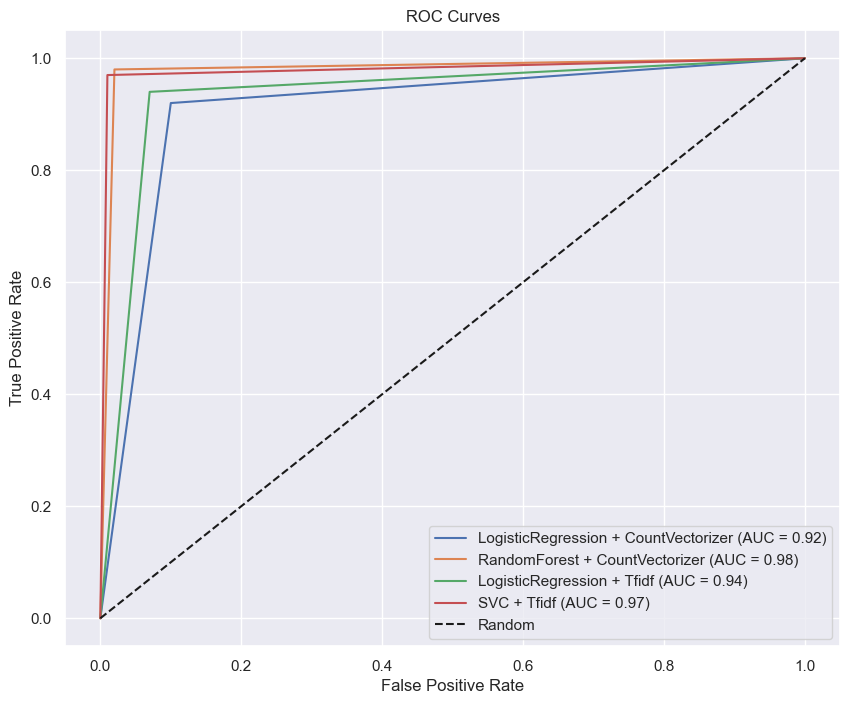

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Simulation of stored results from each model
model_results = {
    "LogisticRegression + CountVectorizer": {
        "fpr": [0.0, 0.1, 1.0],
        "tpr": [0.0, 0.92, 1.0],
        "roc_auc": 0.92,
        "confusion_matrix": np.array([[3225, 170], [43, 138]])
    },
    "RandomForest + CountVectorizer": {
        "fpr": [0.0, 0.02, 1.0],
        "tpr": [0.0, 0.98, 1.0],
        "roc_auc": 0.98,
        "confusion_matrix": np.array([[3390, 5], [78, 103]])
    },
    "LogisticRegression + Tfidf": {
        "fpr": [0.0, 0.07, 1.0],
        "tpr": [0.0, 0.94, 1.0],
        "roc_auc": 0.94,
        "confusion_matrix": np.array([[3158, 237], [36, 145]])
    },
    "SVC + Tfidf": {
        "fpr": [0.0, 0.01, 1.0],
        "tpr": [0.0, 0.97, 1.0],
        "roc_auc": 0.97,
        "confusion_matrix": np.array([[3390, 5], [63, 118]])
    }
}

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, res in model_results.items():
    plt.plot(res["fpr"], res["tpr"], label=f'{name} (AUC = {res["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

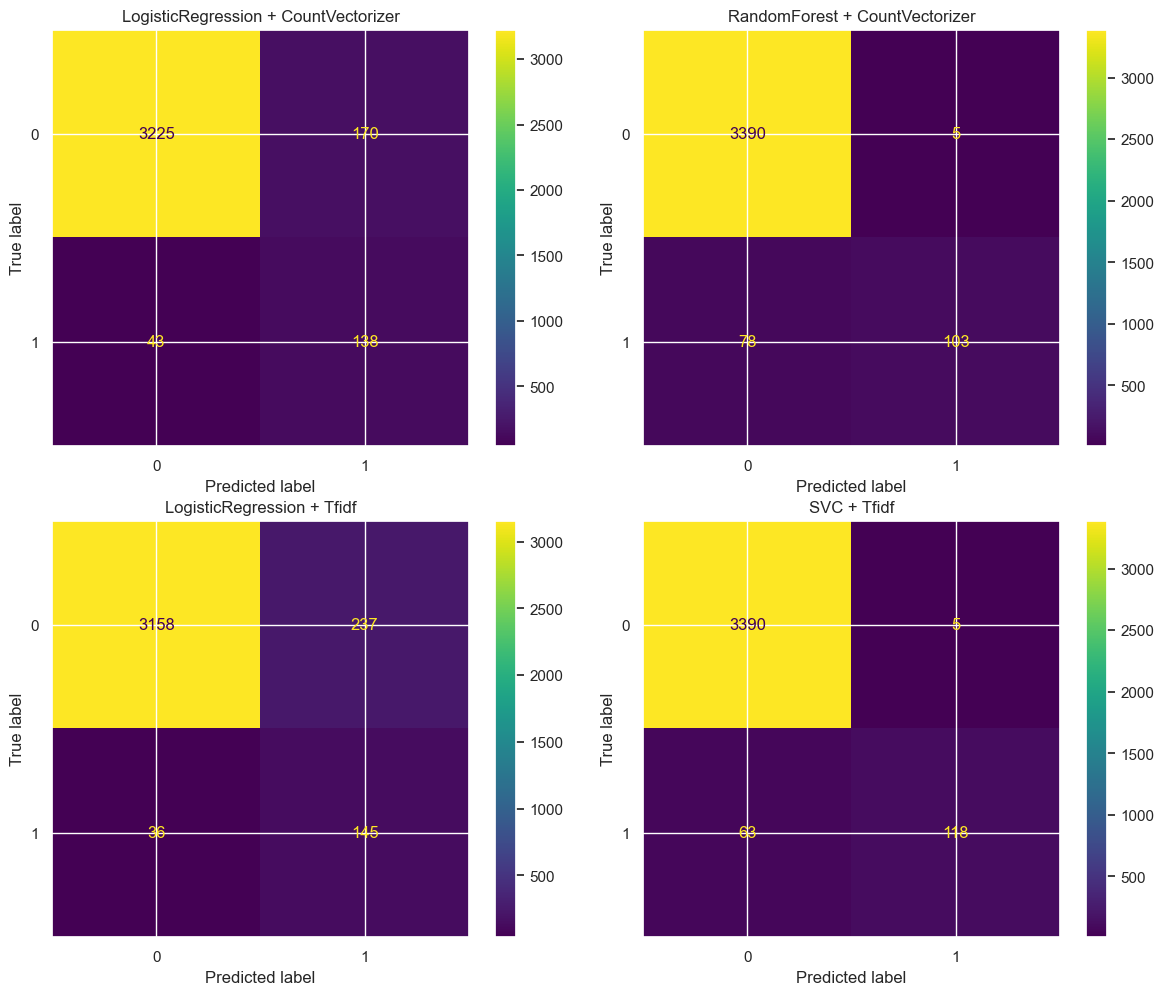

In [153]:
# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (name, res) in enumerate(model_results.items()):
    ConfusionMatrixDisplay(confusion_matrix=res["confusion_matrix"]).plot(ax=axes[i], values_format='d')
    axes[i].set_title(name)
plt.tight_layout()
plt.show()

##### Making a Pickle of Best Model

In [155]:
import pickle

data = {
    "model": lr,
    "vectorizer": tfidf
    }
with open('pickle/notebook_model.pkl', 'wb') as file:
    pickle.dump(data, file)